In [1]:
import numpy as np
import pandas as pd
from IPython.display import display, HTML, Image
from scipy.stats import ttest_ind_from_stats, spearmanr
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [3]:
X_level2 = pd.read_hdf('D:/data/MIMICIV_EXtract/vitals_hourly_data.h5')

In [5]:
X_level2.shape

(2750125, 261)

In [6]:
X_level2['h']

LEVEL2                                  Alanine aminotransferase           \
Aggregation Function                                       count mean std   
subject_id hadm_id  icustay_id hours_in                                     
10001217   24597018 37067082   0                             0.0  NaN NaN   
                               1                             0.0  NaN NaN   
                               2                             0.0  NaN NaN   
                               3                             0.0  NaN NaN   
                               4                             0.0  NaN NaN   
                               5                             0.0  NaN NaN   
                               6                             0.0  NaN NaN   
                               7                             0.0  NaN NaN   
                               8                             0.0  NaN NaN   
                               9                             0.0  NaN NaN   
                               10                            0.0  NaN NaN   
                               11                            0.0  NaN NaN   
                               12                            0.0  NaN NaN   
                               13                            0.0  NaN NaN   
                               14                            0.0  NaN NaN   
                               15                            0.0  NaN NaN   
                               16                            0.0  NaN NaN   
                               17                            0.0  NaN NaN   
                               18                            0.0  NaN NaN   
                               19                            0.0  NaN NaN   
                               20                            0.0  NaN NaN   
                               21                            0.0  NaN NaN   
                               22                            0.0  NaN NaN   
                               23                            0.0  NaN NaN   
                               24                            0.0  NaN NaN   
                               25                            0.0  NaN NaN   
                               26                            0.0  NaN NaN   
10001725   25563031 31205490   0                             0.0  NaN NaN   
                               1                             0.0  NaN NaN   
                               2                             0.0  NaN NaN   
...                                                          ...  ...  ..   
19999987   23865745 36195440   17                            0.0  NaN NaN   
                               18                            0.0  NaN NaN   
                               19                            0.0  NaN NaN   
                               20                            0.0  NaN NaN   
                               21                            0.0  NaN NaN   
                               22                            0.0  NaN NaN   
                               23                            0.0  NaN NaN   
                               24                            0.0  NaN NaN   
                               25                            0.0  NaN NaN   
                               26                            0.0  NaN NaN   
                               27                            0.0  NaN NaN   
                               28                            0.0  NaN NaN   
                               29                            0.0  NaN NaN   
                               30                            0.0  NaN NaN   
                               31                            0.0  NaN NaN   
                               32                            0.0  NaN NaN   
                               33                            0.0  NaN NaN   
                               34                            0.0  NaN NaN

In [7]:
S = pd.read_csv('D:/data/MIMICIV_EXtract/static_data.csv')

In [8]:
S

,subject_id,hadm_id,icustay_id,gender,ethnicity,age,insurance,admittime,diagnosis_at_admission,dischtime,...,intime,outtime,los_icu,admission_type,first_careunit,mort_icu,mort_hosp,hospital_expire_flag,hospstay_seq,readmission_30
0,10001217,24597018,37067082,F,WHITE,55.881486,Other,2157-11-18 22:56:00,3240;3484;3485;5180;340;04109;3051;4019;V168;V161,2157-11-25 18:00:00,...,2157-11-20 19:18:02,2157-11-21 22:08:00,1.12,EW EMER.,Surgical Intensive Care Unit (SICU),0,0,0,1,0
1,10001725,25563031,31205490,F,WHITE,46.275517,Other,2110-04-11 15:08:00,78829;9950;6185;49390;53081;30000;311;7291;564...,2110-04-14 15:00:00,...,2110-04-11 15:52:22,2110-04-12 23:59:56,1.34,EW EMER.,Medical/Surgical Intensive Care Unit (MICU/SICU),0,0,0,1,0
2,10001884,26184834,37510196,F,BLACK/AFRICAN AMERICAN,77.018296,Medicare,2131-01-07 20:39:00,J441;K7200;R579;J9602;J9601;I442;I82621;I4891;...,2131-01-20 05:15:00,...,2131-01-11 04:20:05,2131-01-20 08:27:30,9.17,OBSERVATION ADMIT,Medical Intensive Care Unit (MICU),1,1,1,1,0
3,10002013,23581541,39060235,F,OTHER,57.378803,Medicare,2160-05-18 07:45:00,41401;42832;5180;4280;4139;4400;4019;34690;715...,2160-05-23 13:30:00,...,2160-05-18 10:00:53,2160-05-19 17:33:33,1.31,SURGICAL SAME DAY ADMISSION,Cardiac Vascular Intensive Care Unit (CVICU),0,0,0,1,0
4,10002155,23822395,33685454,F,WHITE,81.592179,Other,2129-08-04 12:44:00,41011;486;42821;41402;99672;7455;1628;2761;414...,2129-08-18 16:53:00,...,2129-08-04 12:45:00,2129-08-10 17:02:38,6.18,EW EMER.,Coronary Care Unit (CCU),0,0,0,1,0
5,10002348,22725460,32610785,F,WHITE,77.917014,Medicare,2112-11-30 22:22:00,C7931;G935;G936;G911;C3490;F05;I10;F17210;G510...,2112-12-10 17:56:00,...,2112-11-30 23:24:00,2112-12-10 18:25:13,9.79,OBSERVATION ADMIT,Neuro Intermediate,0,0,0,1,0
6,10002428,28662225,33987268,F,WHITE,81.280232,Medicare,2156-04-12 14:16:00,0383;78552;5184;5845;5809;34831;486;51881;0084...,2156-04-29 16:26:00,...,2156-04-12 16:24:18,2156-04-17 15:57:08,4.98,EW EMER.,Medical Intensive Care Unit (MICU),0,0,0,1,1
7,10002430,26295318,38392119,M,WHITE,90.446367,Medicare,2129-06-13 00:00:00,I5023;J189;J9691;C7951;J90;N179;I255;I480;Z790...,2129-06-24 16:01:00,...,2129-06-13 00:43:08,2129-06-15 22:51:40,2.92,URGENT,Coronary Care Unit (CCU),0,0,0,1,0
8,10002443,21329021,35044219,M,WHITE,53.793918,Other,2183-10-17 23:20:00,I309;J9602;I314;I480;E119;Z66;I10;M069;E785;Z8...,2183-10-20 18:47:00,...,2183-10-18 00:47:00,2183-10-20 18:48:03,2.75,EW EMER.,Coronary Care Unit (CCU),0,0,0,1,0
9,10002495,24982426,36753294,M,UNKNOWN,81.388359,Medicare,2141-05-22 20:17:00,I214;R570;I509;R578;A047;N179;S3730XA;I2510;E1...,2141-05-29 17:41:00,...,2141-05-22 20:18:01,2141-05-27 22:24:02,5.09,URGENT,Coronary Care Unit (CCU),0,0,0,1,0


In [9]:
def categorize_age(age):
    if age > 10 and age <= 30: 
        cat = '<31'
    elif age > 30 and age <= 50:
        cat = '31-50'
    elif age > 50 and age <= 70:
        cat = '51-70'
    else: 
        cat = '>70'
    return cat
def categorize_ethnicity(ethnicity):
    if 'ASIAN' in ethnicity:
        ethnicity = 'ASIAN'
    elif 'WHITE' in ethnicity:
        ethnicity = 'WHITE'
    elif 'HISPANIC' in ethnicity:
        ethnicity = 'HISPANIC/LATINO'
    elif 'BLACK' in ethnicity:
        ethnicity = 'BLACK'
#    elif 'AMERICAN INDIAN' in ethnicity:
#        ethnicity = 'AMERICAN INDIAN'
    else: 
        ethnicity = 'OTHER'
    return ethnicity
def categorize_age(age):
    if age > 10 and age <= 30: 
        cat = '<31'
    elif age > 30 and age <= 50:
        cat = '31-50'
    elif age > 50 and age <= 70:
        cat = '51-70'
    else: 
        cat = '>70'
    return cat
def categorize_ethnicity(ethnicity):
    if 'ASIAN' in ethnicity:
        ethnicity = 'ASIAN'
    elif 'WHITE' in ethnicity:
        ethnicity = 'WHITE'
    elif 'HISPANIC' in ethnicity:
        ethnicity = 'HISPANIC/LATINO'
    elif 'BLACK' in ethnicity:
        ethnicity = 'BLACK'
#    elif 'AMERICAN INDIAN' in ethnicity:
#        ethnicity = 'AMERICAN INDIAN'
    else: 
        ethnicity = 'OTHER'
    return ethnicity

In [10]:
S['age_bucket'] = S['age'].apply(categorize_age)
S['ethnicity_bucket'] = S['ethnicity'].apply(categorize_ethnicity)

In [11]:
S

,subject_id,hadm_id,icustay_id,gender,ethnicity,age,insurance,admittime,diagnosis_at_admission,dischtime,...,los_icu,admission_type,first_careunit,mort_icu,mort_hosp,hospital_expire_flag,hospstay_seq,readmission_30,age_bucket,ethnicity_bucket
0,10001217,24597018,37067082,F,WHITE,55.881486,Other,2157-11-18 22:56:00,3240;3484;3485;5180;340;04109;3051;4019;V168;V161,2157-11-25 18:00:00,...,1.12,EW EMER.,Surgical Intensive Care Unit (SICU),0,0,0,1,0,51-70,WHITE
1,10001725,25563031,31205490,F,WHITE,46.275517,Other,2110-04-11 15:08:00,78829;9950;6185;49390;53081;30000;311;7291;564...,2110-04-14 15:00:00,...,1.34,EW EMER.,Medical/Surgical Intensive Care Unit (MICU/SICU),0,0,0,1,0,31-50,WHITE
2,10001884,26184834,37510196,F,BLACK/AFRICAN AMERICAN,77.018296,Medicare,2131-01-07 20:39:00,J441;K7200;R579;J9602;J9601;I442;I82621;I4891;...,2131-01-20 05:15:00,...,9.17,OBSERVATION ADMIT,Medical Intensive Care Unit (MICU),1,1,1,1,0,>70,BLACK
3,10002013,23581541,39060235,F,OTHER,57.378803,Medicare,2160-05-18 07:45:00,41401;42832;5180;4280;4139;4400;4019;34690;715...,2160-05-23 13:30:00,...,1.31,SURGICAL SAME DAY ADMISSION,Cardiac Vascular Intensive Care Unit (CVICU),0,0,0,1,0,51-70,OTHER
4,10002155,23822395,33685454,F,WHITE,81.592179,Other,2129-08-04 12:44:00,41011;486;42821;41402;99672;7455;1628;2761;414...,2129-08-18 16:53:00,...,6.18,EW EMER.,Coronary Care Unit (CCU),0,0,0,1,0,>70,WHITE
5,10002348,22725460,32610785,F,WHITE,77.917014,Medicare,2112-11-30 22:22:00,C7931;G935;G936;G911;C3490;F05;I10;F17210;G510...,2112-12-10 17:56:00,...,9.79,OBSERVATION ADMIT,Neuro Intermediate,0,0,0,1,0,>70,WHITE
6,10002428,28662225,33987268,F,WHITE,81.280232,Medicare,2156-04-12 14:16:00,0383;78552;5184;5845;5809;34831;486;51881;0084...,2156-04-29 16:26:00,...,4.98,EW EMER.,Medical Intensive Care Unit (MICU),0,0,0,1,1,>70,WHITE
7,10002430,26295318,38392119,M,WHITE,90.446367,Medicare,2129-06-13 00:00:00,I5023;J189;J9691;C7951;J90;N179;I255;I480;Z790...,2129-06-24 16:01:00,...,2.92,URGENT,Coronary Care Unit (CCU),0,0,0,1,0,>70,WHITE
8,10002443,21329021,35044219,M,WHITE,53.793918,Other,2183-10-17 23:20:00,I309;J9602;I314;I480;E119;Z66;I10;M069;E785;Z8...,2183-10-20 18:47:00,...,2.75,EW EMER.,Coronary Care Unit (CCU),0,0,0,1,0,51-70,WHITE
9,10002495,24982426,36753294,M,UNKNOWN,81.388359,Medicare,2141-05-22 20:17:00,I214;R570;I509;R578;A047;N179;S3730XA;I2510;E1...,2141-05-29 17:41:00,...,5.09,URGENT,Coronary Care Unit (CCU),0,0,0,1,0,>70,OTHER


In [14]:
by_ethnicity = S.reset_index().pivot_table(index='ethnicity_bucket',
                                                  columns='gender',
                                                  values=['icustay_id','mort_icu','mort_hosp'],
                                                  aggfunc={'icustay_id': 'count',
                                                           'mort_icu': 'mean',
                                                           'mort_hosp':'mean'},
                                                  margins=True)
by_ethnicity = by_ethnicity.sort_values(by=('icustay_id','All'))
by_ethnicity = pd.concat([by_ethnicity], keys=['ethnicity_bucket'], names=['item'])

by_insurance = S.reset_index().pivot_table(index='insurance',
                                                  columns='gender',
                                                  values=['icustay_id','mort_icu','mort_hosp'],
                                                  aggfunc={'icustay_id': 'count',
                                                           'mort_icu': 'mean',
                                                           'mort_hosp':'mean'},
                                                  margins=True)
by_insurance = by_insurance.sort_values(by=('icustay_id','All'))
by_insurance = pd.concat([by_insurance], keys=['insurance'], names=['item'])

by_age = S.reset_index().pivot_table(index='age_bucket',
                                            columns='gender',
                                            values=['icustay_id','mort_icu','mort_hosp'],
                                            aggfunc={'icustay_id': 'count',
                                                     'mort_icu': 'mean',
                                                     'mort_hosp':'mean'},
                                            margins=True)
by_age = by_age.sort_values(by=('icustay_id','All'))
by_age = pd.concat([by_age], keys=['age'], names=['item'])

by_admission = S.reset_index().pivot_table(index='admission_type',
                                                  columns='gender',
                                                  values=['icustay_id','mort_icu','mort_hosp'],
                                                  aggfunc={'icustay_id': 'count',
                                                           'mort_icu': 'mean',
                                                           'mort_hosp':'mean'},
                                                  margins=True)
by_admission = by_admission.sort_values(by=('icustay_id','All'))
by_admission = pd.concat([by_admission], keys=['admission_type'], names=['item'])

by_unit = S.reset_index().pivot_table(index='first_careunit',
                                              columns='gender',
                                              values=['icustay_id','mort_icu','mort_hosp'],
                                              aggfunc={'icustay_id': 'count',
                                                       'mort_icu': 'mean',
                                                       'mort_hosp':'mean'},
                                              margins=True)
by_unit = by_unit.sort_values(by=('icustay_id','All'))
by_unit = pd.concat([by_unit], keys=['first_careunit'], names=['item'])

In [15]:
demographics = pd.concat([by_ethnicity, by_age, by_insurance, by_admission, by_unit],axis=0)
demographics.index.names = ['item','values']
demographics

icustay_id  \
gender                                                                     F   
item             values                                                        
ethnicity_bucket ASIAN                                                   605   
                 HISPANIC/LATINO                                         673   
                 BLACK                                                  2264   
                 OTHER                                                  3139   
                 WHITE                                                 13629   
                 All                                                   20310   
age              <31                                                     936   
                 31-50                                                  2692   
                 51-70                                                  7117   
                 >70                                                    9565   
                 All                                                   20310   
insurance        Medicaid                                               1403   
                 Medicare                                               9395   
                 Other                                                  9512   
                 All                                                   20310   
admission_type   AMBULATORY OBSERVATION                                    6   
                 DIRECT OBSERVATION                                       48   
                 EU OBSERVATION                                          113   
                 DIRECT EMER.                                            674   
                 ELECTIVE                                                768   
                 OBSERVATION ADMIT                                      2327   
                 SURGICAL SAME DAY ADMISSION                            2463   
                 URGENT                                                 3476   
                 EW EMER.                                              10435   
                 All                                                   20310   
first_careunit   Neuro Stepdown                                          426   
                 Neuro Surgical Intensive Care Unit (Neuro SICU)         521   
                 Neuro Intermediate                                      766   
                 Coronary Care Unit (CCU)                               2268   
                 Trauma SICU (TSICU)                                    2419   
                 Surgical Intensive Care Unit (SICU)                    3400   
                 Medical/Surgical Intensive Care Unit (MICU/SICU)       3850   
                 Cardiac Vascular Intensive Care Unit (CVICU)           2684   
                 Medical Intensive Care Unit (MICU)                     3976   
                 All                                                   20310   

                                                                          \
gender                                                                 M   
item             values                                                    
ethnicity_bucket ASIAN                                               754   
                 HISPANIC/LATINO                                     889   
                 BLACK                                              1929   
                 OTHER                                              4554   
                 WHITE                                             17471   
                 All                                               25597   
age              <31                                                1164   
                 31-50                                              3433   
                 51-70                                             10991   
                 >70                                               10009   
                 All                 

In [16]:
S.isnull().sum()

subject_id                    0
hadm_id                       0
icustay_id                    0
gender                        0
ethnicity                     0
age                           0
insurance                     0
admittime                     0
diagnosis_at_admission        0
dischtime                     0
discharge_location          362
fullcode_first            24265
dnr_first                 24265
fullcode                  24265
dnr                       24265
dnr_first_charttime       43876
timecmo_chart             45493
cmo_first                 24265
cmo_last                  24265
cmo                       24265
deathtime                 41837
intime                        0
outtime                       0
los_icu                       0
admission_type                0
first_careunit                0
mort_icu                      0
mort_hosp                     0
hospital_expire_flag          0
hospstay_seq                  0
readmission_30                0
age_buck

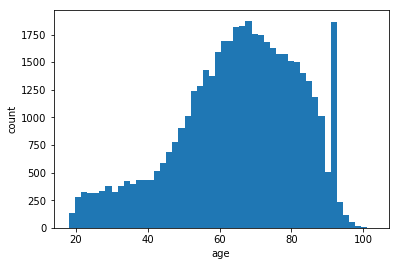

In [23]:
age = S['age']
age = age[age<300]
plt.hist(age, bins=50)
plt.xlabel('age')
plt.ylabel('count')
plt.show()

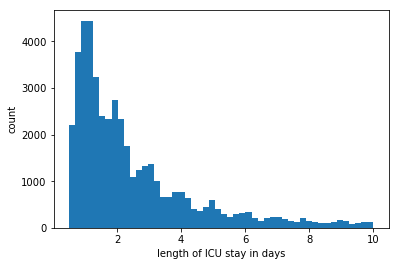

In [24]:
los = S['los_icu']
plt.hist(los, bins=50)
plt.xlabel('length of ICU stay in days')
plt.ylabel('count')
plt.show()

In [28]:
idx = pd.IndexSlice
vitals_mean = pd.DataFrame(X_level2.loc[:, idx[:, 'mean']].mean(),columns=['mean'])
vitals_std = pd.DataFrame(X_level2.loc[:, idx[:, 'mean']].std(),columns=['stdev'])
vitals_missing = pd.DataFrame(X_level2.loc[:, idx[:, 'mean']].isnull().sum()/X_level2.loc[:, idx[:, 'mean']].shape[0]*100,columns=['missing percent'])

vitals_summary = pd.concat([vitals_mean,vitals_std,vitals_missing],axis=1)
vitals_summary.index = vitals_summary.index.droplevel(1)
vitals_summary.sort_values(by='missing percent', ascending=True,inplace=True)
vitals_summary

,mean,stdev,missing percent
LEVEL2,,,
Heart Rate,84.326203,17.781257,7.329230
Respiratory rate,19.155504,5.618566,8.275042
Oxygen saturation,96.375419,3.461097,9.537566
Mean blood pressure,79.465526,15.723461,11.776447
Systolic blood pressure,120.742813,21.334597,11.825172
Diastolic blood pressure,63.728014,14.930738,11.842880
Temperature,36.914925,0.645038,72.950030
Glucose,144.590343,59.125736,79.634126
Central Venous Pressure,12.672599,24.931308,88.735021


In [4]:
Y = pd.read_hdf('D:/data/MIMICIV_EXtract/outcomes_hourly_data.h5')

In [5]:
Y

vent  vaso  adenosine  dobutamine  \
subject_id hadm_id  icustay_id hours_in                                      
10001217   24597018 37067082   0            0     0          0           0   
                               1            0     0          0           0   
                               2            0     0          0           0   
                               3            0     0          0           0   
                               4            0     0          0           0   
                               5            0     0          0           0   
                               6            0     0          0           0   
                               7            0     0          0           0   
                               8            0     0          0           0   
                               9            0     0          0           0   
                               10           0     0          0           0   
                               11           0     0          0           0   
                               12           0     0          0           0   
                               13           0     0          0           0   
                               14           0     0          0           0   
                               15           0     0          0           0   
                               16           0     0          0           0   
                               17           0     0          0           0   
                               18           0     0          0           0   
                               19           0     0          0           0   
                               20           0     0          0           0   
                               21           0     0          0           0   
                               22           0     0          0           0   
                               23           0     0          0           0   
                               24           0     0          0           0   
                               25           0     0          0           0   
                               26           0     0          0           0   
10001725   25563031 31205490   0            0     0          0           0   
                               1            0     0          0           0   
                               2            0     0          0           0   
...                                       ...   ...        ...         ...   
19999987   23865745 36195440   17           1     0          0           0   
                               18           1     0          0           0   
                               19           1     0          0           0   
                               20           1     0          0           0   
                               21           1     0          0           0   
                               22           1     0          0           0   
                               23           1     0          0           0   
                               24           1     0          0           0   
                               25           1     0          0           0   
                               26           1     0          0           0   
                               27           0     0          0           0   
                               28           0     0          0           0   
                               29           0     0          0           0   
                               30           0     0          0           0   
                               31           0     0          0           0   
                               32           0     0          0           0   
                               33           0     0          0           0   
                               34           0     0          0           0   
                               35           0     0          0 

In [13]:
Y_sum = pd.DataFrame(Y.sum(),columns=['count'])
Y_missing = pd.DataFrame(100 - Y.sum() / Y.shape[0] * 100,columns=['missing percent'])
Y_summary = pd.concat([Y_sum,Y_missing],axis=1)
Y_summary.sort_values(by='missing percent', ascending=True,inplace=True)
Y_summary

,count,missing percent
nivdurations,890558,67.617545
vent,453395,83.513658
vaso,353091,87.160911
norepinephrine,186916,93.203363
phenylephrine,134573,95.106659
crystalloid_bolus,76168,97.230380
vasopressin,56990,97.927731
epinephrine,29837,98.915067
milrinone,21902,99.203600
dopamine,20925,99.239125
